In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
dirname1 = "dataset/CoREMOF2019-mofdb-version-dc8a0295db/"
dirname2 = "dataset/Anion-pillared_MOFdataset/Database/"


nb_atoms = np.zeros(len(os.listdir(dirname1))+ len(os.listdir(dirname2)))
nb_atoms_noH = np.zeros(len(os.listdir(dirname1))+ len(os.listdir(dirname2)))
i=0

for files in os.listdir(dirname1):
    if not files.endswith("cif"):
        continue
    with open(dirname1+files, "r") as f:
        
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 25
        if(num_lines-25 < 20):
            print(files, num_lines-25)
                    
        f.seek(0)
        num_lines2 = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines2 - 24
        #if(num_lines2-24 < 20):
        #    print(files, num_lines2-24)
        i+=1
        if(i%100==0):
            print(i, "  elements")

for files in os.listdir(dirname2):
    if not files.endswith("cif"):
        continue
    with open(dirname2+files, "r") as f:
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 30

        f.seek(0)
        num_lines = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines - 29
        
        i+=1
        if(i%100==0):
            print(i, "  elements")


100   elements
200   elements
300   elements
400   elements
500   elements
600   elements
700   elements
800   elements
900   elements
1000   elements
1100   elements
1200   elements
1300   elements
1400   elements
MOCJEU_clean.cif 17
1500   elements
1600   elements
1700   elements
1800   elements
1900   elements
2000   elements
MOCJAQ_clean.cif 17
2100   elements
2200   elements
2300   elements
KAHPUE_clean.cif 19
2400   elements
2500   elements
GISZUD_clean.cif 19
2600   elements
2700   elements
ja4012707_si_004_clean.cif 19
2800   elements
2900   elements
3000   elements
3100   elements
FIGXAU_clean.cif 12
3200   elements
3300   elements
3400   elements
3500   elements
3600   elements
DUXZIG01_clean.cif 19
3700   elements
LUFQUZ02_clean.cif 19
3800   elements
ja4012707_si_003_clean.cif 9
3900   elements
4000   elements
4100   elements
4200   elements
4300   elements
4400   elements
HADPOU_clean.cif 19
4500   elements
CICYIX_clean.cif 15
4600   elements
VECZEI_clean.cif 19
FIVNAZ_cle

In [3]:
print(nb_atoms)
print(nb_atoms_noH)

[ 78. 293. 611. ...   0.   0.   0.]
[ 58. 202. 503. ...   0.   0.   0.]


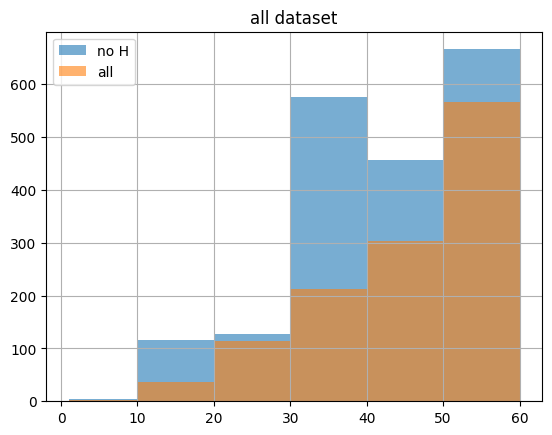

In [4]:
import matplotlib.pyplot as plt
bins=[1,10,20,30,40,50,60]

plt.hist(nb_atoms_noH, bins= bins, alpha = 0.6, label = 'no H')

plt.hist(nb_atoms,bins = bins, alpha = 0.6,label = 'all') 
#plt.yscale('log')
plt.title("all dataset")

plt.legend()
plt.grid()
plt.show()

In [5]:

df = pd.read_csv('MOF-CO2/Co2WithVolumetricAtomTypes.csv')
df = df.dropna()

df2 = df.drop_duplicates(['MOF'],keep='first')


In [6]:
print(len(df2))

4243


In [7]:
threshold = 25

nb_atoms_dataset = np.zeros(len(df2))
nb_atoms_dataset_noH = np.zeros(len(df2))
error_mof = []
select_mof = []
error=0
i=0
for _, row in df2.iterrows():
    if(row['MOF']+"_clean.cif" in os.listdir(dirname1)):
        with open(dirname1+row['MOF']+"_clean.cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 24  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 23
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
    elif(row['MOF']+"_manual.cif" in os.listdir(dirname1)):
        with open(dirname1+row['MOF']+"_manual.cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 24  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 23
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
                
    elif(row['MOF']+".cif" in os.listdir(dirname2)):
        with open(dirname2+row['MOF']+".cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 30  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 29
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
    else:
        error_mof.append(row['MOF'])
        error+=1
        i+=1

print("number of errors: ", error, " out of ", len(df2))
    #break

number of errors:  90  out of  4243


In [8]:
len(select_mof)

38

In [17]:
select_mof

['AHOKIR01',
 'BOHGOU',
 'CICYIX',
 'EBEMEF',
 'FIGXAU',
 'FIGXEY',
 'FIVNAZ',
 'FUTJOV',
 'GISZUD',
 'HAKWUM',
 'IGAHED',
 'KAHPUE',
 'KECRAL10',
 'LIKFOB',
 'LUFQUZ01',
 'LUFQUZ02',
 'LUFQUZ',
 'MOCHES',
 'MOCHIW',
 'MOCHOC',
 'MOCHUI',
 'MOCJAQ',
 'MOCJEU',
 'MOCJIY',
 'NINHOH',
 'NIVWIY',
 'OLOKEF',
 'PIYZAZ',
 'REGJIW',
 'RENWEM01',
 'RONZID',
 'RURPAW',
 'RURPEA',
 'SOBZOY',
 'TILVUF',
 'TILWAM',
 'UHISOU',
 'XOMCIL']

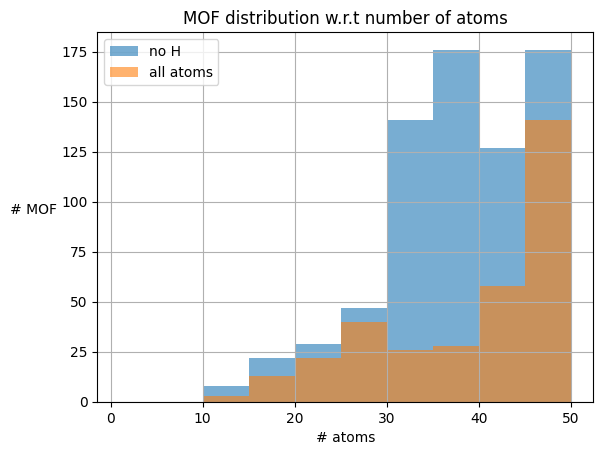

In [9]:
import matplotlib.pyplot as plt
bins=[1,5,10,15,20,25,30,35,40,45,50]

plt.hist(nb_atoms_dataset_noH, bins= bins, alpha = 0.6, label = 'no H')

plt.hist(nb_atoms_dataset,bins = bins, alpha = 0.6,label = 'all atoms') 
plt.xlabel("# atoms")
plt.ylabel("# MOF",rotation=0,labelpad=20)
plt.title("MOF distribution w.r.t number of atoms")
plt.legend()
plt.grid()
plt.show()

In [10]:
#nb_atoms_dataset2 = np.zeros(len(nb_atoms_dataset)*3)
#j = 0
#for el in nb_atoms_dataset:
#    nb_atoms_dataset2[j] = el
#    nb_atoms_dataset2[j+1] = el
#    nb_atoms_dataset2[j+2] = el
#    j+=3


df2["num_atoms"] = nb_atoms_dataset

/var/folders/mc/x5xnf4550vj96w2b0ps613680000gp/T/ipykernel_8134/1731052214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_atoms"] = nb_atoms_dataset


<Axes: ylabel='Frequency'>

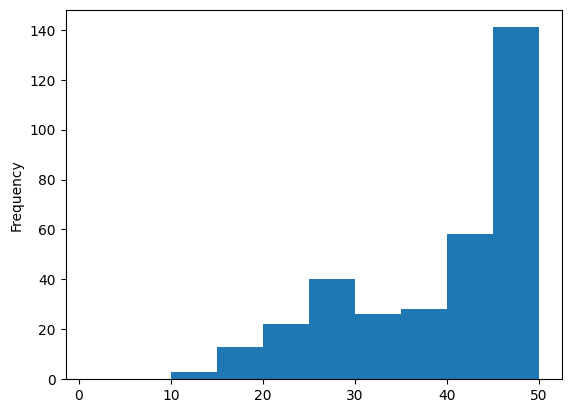

In [11]:
df2["num_atoms"].plot.hist(bins=bins)

In [12]:

with open(dirname1+"ZUSBOG"+"_clean.cif", "r") as f:
    num_lines = sum(1 for _ in f)
    print(num_lines - 25  )
    

75


In [13]:
df3 = df2[df2["MOF"].isin(select_mof)]

In [14]:
print(len(df3))
df3

38


,Unnamed: 0.1,Unnamed: 0,MOF,Uptake,Pressure,H,C,N,F,Cl,...,S3_EigenValue2,S3_EigenState1,S3_EigenState2,S3_EigenState3,S3_EigenState4,S3_Product,S3_MaxProb,S3_MinProb,HenryCoeff_CO2,num_atoms
126,126,126,AHOKIR01,0.327328,40.0,0.027214,0.013607,0.000000,0.000000,0.0,...,-0.474137,0.790748,-0.707107,0.612142,0.707107,0.062633,0.7964,0.4894,0.007381,22.0
1088,1088,1088,BOHGOU,0.014803,40.0,0.010391,0.020782,0.000000,0.000000,0.0,...,-0.611045,0.853307,-0.707107,0.521409,0.707107,0.032174,0.7618,0.3146,0.000367,22.0
1349,1349,1349,CICYIX,1.104384,40.0,0.008411,0.029437,0.000000,0.000000,0.0,...,-0.676731,0.828183,-0.707107,0.560457,0.707107,0.072569,0.8892,0.4048,0.025555,16.0
1962,1962,1962,EBEMEF,0.000273,40.0,0.000000,0.013025,0.013025,0.000000,0.0,...,1.000000,-0.707107,-0.689587,0.707107,-0.724203,0.146439,0.9646,0.5080,0.000006,20.0
2869,2869,2869,FIGXAU,1.575597,40.0,0.012214,0.012214,0.000000,0.000000,0.0,...,-0.719586,0.811693,-0.707107,0.584084,0.707107,0.122614,0.8412,0.5802,0.037558,13.0
2872,2872,2872,FIGXEY,1.340000,40.0,0.011956,0.011956,0.000000,0.000000,0.0,...,-0.715191,0.813385,-0.707107,0.581726,0.707107,0.118350,0.8406,0.5820,0.032294,13.0
2968,2968,2968,FIVNAZ,3.131364,40.0,0.000000,0.009409,0.000000,0.004704,0.0,...,-0.498518,0.723364,-0.707107,0.690466,0.707107,0.138402,0.9276,0.5974,0.421134,16.0
3085,3085,3085,FUTJOV,0.000345,40.0,0.000000,0.022212,0.005126,0.000000,0.0,...,-0.452966,0.788534,-0.707107,0.614991,0.707107,0.055669,0.7896,0.4556,0.000009,22.0
3901,3901,3901,GISZUD,0.000287,40.0,0.000000,0.016342,0.000000,0.000000,0.0,...,1.000000,-0.707107,-0.632821,0.707107,-0.774298,0.136615,0.9740,0.4408,0.000007,20.0
4117,4117,4117,HAKWUM,0.064404,40.0,0.014750,0.007375,0.000000,0.007375,0.0,...,-0.668130,0.831488,-0.707107,0.555542,0.707107,0.074881,0.8678,0.4686,0.001566,18.0


In [15]:
df2[df2["num_atoms"]==0.0]

,Unnamed: 0.1,Unnamed: 0,MOF,Uptake,Pressure,H,C,N,F,Cl,...,S3_EigenValue2,S3_EigenState1,S3_EigenState2,S3_EigenState3,S3_EigenState4,S3_Product,S3_MaxProb,S3_MinProb,HenryCoeff_CO2,num_atoms
667,667,667,AVUPIR,0.010368,40.0,0.036404,0.016382,0.005461,0.0,0.0,...,-0.527639,0.824252,-0.707107,0.566223,0.707107,0.036260,0.8474,0.3376,2.521410e-04,0.0
1115,1115,1115,BOWQAG,0.030618,40.0,0.028453,0.036582,0.020324,0.0,0.0,...,-0.570050,0.868759,-0.707107,0.495236,0.707107,0.004706,0.9066,0.1108,7.474520e-04,0.0
1268,1268,1268,CDLGLU02,0.002764,40.0,0.031224,0.022303,0.004461,0.0,0.0,...,-0.554206,0.874658,-0.707107,0.484741,0.707107,0.008629,0.8452,0.1636,6.043960e-05,0.0
1559,1559,1559,CUIMDZ01,0.003745,40.0,0.030481,0.030481,0.020320,0.0,0.0,...,-0.399621,0.895442,-0.707107,0.445178,0.707107,0.004969,0.8168,0.3352,9.065220e-05,0.0
1613,1613,1613,CUVHIL02,0.209582,40.0,0.002680,0.012060,0.001340,0.0,0.0,...,1.000000,-0.707107,-0.677142,0.707107,-0.735853,0.048379,0.9954,0.2944,4.209350e-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11870,11870,11870,XUWVUG,0.000059,40.0,0.007446,0.022339,0.000000,0.0,0.0,...,-0.472188,0.869306,-0.707107,0.494273,0.707107,0.001465,0.8554,0.0834,1.345350e-06,0.0
11958,11958,11958,YAXBOP,0.002261,40.0,0.014358,0.022973,0.000000,0.0,0.0,...,-0.408123,0.714942,-0.707107,0.699184,0.707107,0.035968,0.9002,0.2272,5.459550e-05,0.0
12033,12033,12033,YIKLUZ,0.000108,40.0,0.019654,0.014741,0.000000,0.0,0.0,...,-0.533619,0.882248,-0.707107,0.470785,0.707107,0.011752,0.8688,0.2318,2.188030e-06,0.0
12171,12171,12171,YUSGOJ,0.003390,40.0,0.025593,0.035830,0.002559,0.0,0.0,...,-0.407726,0.787979,-0.707107,0.615702,0.707107,0.012981,0.9052,0.1032,8.341850e-05,0.0


In [16]:
error_mof

['AVUPIR',
 'BOWQAG',
 'CDLGLU02',
 'CUIMDZ01',
 'CUVHIL02',
 'CUVHIL',
 'DARSEV',
 'DONNAW01',
 'EGELUY',
 'EHODOV',
 'EREFEN01',
 'EVUNIT',
 'EWIDUK',
 'EXEQII',
 'EXOTUH',
 'FAFJIH',
 'FASHUD',
 'FAWCEN01',
 'FAWCEN02',
 'FAWCEN03',
 'FAWCEN',
 'FUWXOL',
 'GAYGAQ',
 'GIYTIS',
 'GUPBUP',
 'GUSNEN01',
 'GUSNEN',
 'HAFVUH',
 'HAZGOF01',
 'HAZGOF02',
 'HAZGOF03',
 'HAZGOF04',
 'HAZGOF05',
 'HAZGOF06',
 'HAZGOF07',
 'HAZGOF08',
 'HELDEJ',
 'HIFGIO',
 'HIWXER01',
 'IFENOY01',
 'IFEQIV',
 'JUTCUW',
 'KEJBOQ',
 'KEJHIQ',
 'LAGWEX',
 'LARZEL',
 'LAZJAZ',
 'NETHOJ',
 'NHBZZN10',
 'OBUFIB',
 'OFERUN02',
 'OFUYUL',
 'PARFOF',
 'PIZNOB',
 'PIZPAP',
 'PIZPET',
 'PIZPIX',
 'PIZPOD',
 'PUQHIT',
 'QALGUH',
 'QIDDAI01',
 'QIDDAI',
 'QOVWOO',
 'QUQPOI',
 'REFTON',
 'RONZUP',
 'RUBTAK01',
 'RUBTAK02',
 'RUHCED',
 'SABWAU',
 'SAQQOR',
 'SEVWEV',
 'SOXHUI',
 'SUGDIJ',
 'VOGTIV',
 'VOYWUB',
 'WAYMEQ',
 'WEHNAA',
 'WOHZAU01',
 'XAJQAC',
 'XAVDEF',
 'XAXQEU',
 'XENMIO',
 'XENMOU',
 'XESKIR',
 'XUWVUG',
 'YA